In [59]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#point to files
mouse_metadata = 'data/Mouse_metadata.csv'
study_results = 'data/Study_results.csv'

#read csv files
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

#combine data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [60]:
#Generate a 'Summary Statistics' table of tumor volume for each regimen

#Grouping the data by regimen
regimen_group = merged_df.groupby('Drug Regimen')
regimens = regimen_group["Drug Regimen"].unique()

#calculating summary statistics of tumor size for each regimen
mean_tumor = regimen_group['Tumor Volume (mm3)'].mean()
mean = []
for x in mean_tumor:
    mean.append(x)
median_tumor = regimen_group['Tumor Volume (mm3)'].median()
median = []
for x in median_tumor:
    median.append(x)
var_tumor = regimen_group['Tumor Volume (mm3)'].var()
variance = []
for x in var_tumor:
    variance.append(x)
std_tumor = regimen_group['Tumor Volume (mm3)'].std()
stddev = []
for x in std_tumor:
    stddev.append(x)
sem_tumor = regimen_group['Tumor Volume (mm3)'].sem()
sem = []
for x in sem_tumor:
    sem.append(x)

#creating the dataframe
sum_stat = {"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, 
           "Tumor Volume Std. Dev.": stddev, "Tumor Volume Std. Err.": sem}
sum_stat_df = pd.DataFrame(sum_stat).set_index(regimens)
sum_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
[Capomulin],40.675741,41.557809,24.947764,4.994774,0.329346
[Ceftamin],52.591172,51.776157,39.290177,6.268188,0.469821
[Infubinol],52.884795,51.820584,43.128684,6.567243,0.492236
[Ketapril],55.235638,53.698743,68.553577,8.279709,0.603860
[Naftisol],54.331565,52.509285,66.173479,8.134708,0.596466
[Placebo],54.033581,52.288934,61.168083,7.821003,0.581331
[Propriva],52.322552,50.854632,42.351070,6.507770,0.512884
[Ramicane],40.216745,40.673236,23.486704,4.846308,0.320955
[Stelasyn],54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

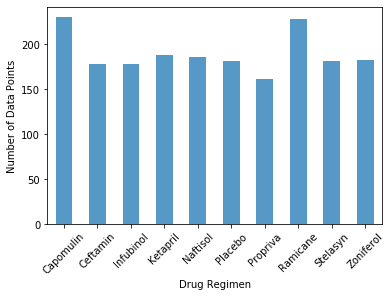

In [87]:
#Generate a bar plot showing the number of data points for each treatment regimen using PANDAS

regimen_counts_df = regimen_group.count()
regimen_bargraph = regimen_counts_df['Mouse ID']
regimen_bargraph.plot(kind='bar', alpha=0.75, rot=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

Text(0, 0.5, 'Number of Data Points')

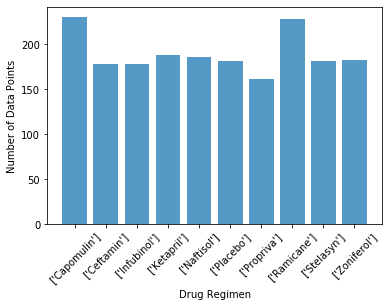

In [93]:
#Generate the same bar graph using PYPLOT

x_axis = np.arange(len(regimens))
xticks = [value for value in x_axis]
datapoints = []
for x in regimen_bargraph:
    datapoints.append(x)
plt.bar(x_axis, datapoints, alpha=0.75, align='center')
plt.xticks(xticks, regimens, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")